In [1]:
# Import the dependencies
import pandas as pd
import plotly.express as px
import scipy.stats as sts
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl

In [2]:
# Read the Pymaceutical_data.csv into a DataFrame
pymaceutical_data = pd.read_csv(r"C:\Users\david\Downloads\Pymaceutical_data.csv")
pymaceutical_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,a457,0,45.0,0,Ketapril,Female,11,30
3,c819,0,45.0,0,Ketapril,Male,21,25
4,h246,0,45.0,0,Ketapril,Male,13,30


### Does drug treatment significantly reduce tumor volume? 

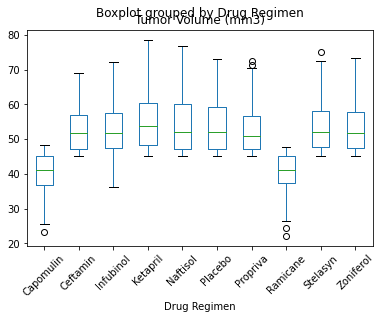

In [3]:
# Create a boxplot that compares the drug regimens and tumor

pymaceutical_data.boxplot(by = 'Drug Regimen', column = 'Tumor Volume (mm3)',grid=False)
plt.xticks(rotation=45)
plt.show()

In [4]:
# Create individual data Series, one for each drug treatment that has the tumor volume for each mouse.
drugs = [x for x in pymaceutical_data['Drug Regimen'].unique()]

Capomulin = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Capomulin']['Tumor Volume (mm3)']
Ketapril = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Ketapril']['Tumor Volume (mm3)']
Naftisol = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Naftisol']['Tumor Volume (mm3)']
Infubinol = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Infubinol']['Tumor Volume (mm3)']
Stelasyn = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Stelasyn']['Tumor Volume (mm3)']
Ramicane = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Ramicane']['Tumor Volume (mm3)']
Zoniferol = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Zoniferol']['Tumor Volume (mm3)']
Propriva = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Propriva']['Tumor Volume (mm3)']
Placebo = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Placebo']['Tumor Volume (mm3)']
Ceftamin = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Ceftamin']['Tumor Volume (mm3)']


In [5]:
# Perform the ANOVA
sts.f_oneway(Capomulin, Ramicane, Ketapril, Infubinol, Stelasyn, Zoniferol, Propriva, Placebo, Ceftamin)


F_onewayResult(statistic=153.22119637739257, pvalue=2.1088641400166084e-190)

In [6]:
# Run Pairwise Tukey HSD test.
tukey = pairwise_tukeyhsd(endog=pymaceutical_data['Tumor Volume (mm3)'],
                          groups=pymaceutical_data["Drug Regimen"],
                          alpha=0.05)
print(tukey)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
  group1    group2  meandiff p-adj   lower    upper   reject
------------------------------------------------------------
Capomulin  Ceftamin  12.3176  0.001  10.0844  14.5507   True
Capomulin Infubinol  12.6358  0.001  10.4173  14.8544   True
Capomulin  Ketapril  14.7368  0.001  12.5457  16.9279   True
Capomulin  Naftisol  13.8471  0.001  11.5909  16.1033   True
Capomulin   Placebo  13.3989  0.001  11.1544  15.6434   True
Capomulin  Propriva  12.1989  0.001   9.8175  14.5803   True
Capomulin  Ramicane   0.0301    0.9  -2.0524   2.1127  False
Capomulin  Stelasyn  13.4248  0.001  11.1686   15.681   True
Capomulin Zoniferol  12.8832  0.001  10.6537  15.1126   True
 Ceftamin Infubinol   0.3182    0.9   -2.025   2.6615  False
 Ceftamin  Ketapril   2.4192 0.0325    0.102   4.7364   True
 Ceftamin  Naftisol   1.5296 0.5625  -0.8494   3.9085  False
 Ceftamin   Placebo   1.0813    0.9  -1.2865   3.4491  False
 Ceftamin  Propriva  -0.

#### Which drug treatments significantly reduce tumor volume? Support your results from the statistical analysis.
Ramicane and Campomulin have the lowest tumor size volume drugs out of all their competitors. Also, when the variables are removed from ANOVA the p-value dramatically goes down indicating that they are important for the relationship between drug to tumor volume. 

### At 45 days, which drug treatments are more effective at significantly reducing the number of metastic sites? 

In [7]:
# Create a new DataFrame with the last time point (45 days). 

pymaceutical_data_45d = pymaceutical_data.loc[pymaceutical_data['Timepoint']==45]

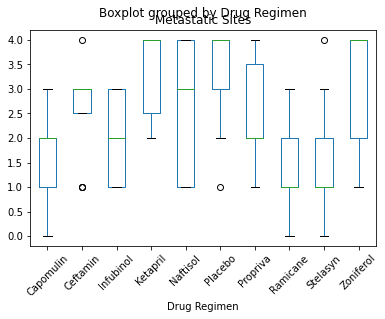

In [8]:
# Create a boxplot that compares the drug regimens and metastatic sites.
pymaceutical_data_45d.boxplot(by = 'Drug Regimen', column = 'Metastatic Sites',grid=False)
plt.xticks(rotation=45)
plt.show()

In [9]:
# Create individual data Series, one for each drug treatment that has the metastatic sites for each mouse.

Capomulin = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Capomulin']['Metastatic Sites']
Ketapril = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Ketapril']['Metastatic Sites']
Naftisol = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Naftisol']['Metastatic Sites']
Infubinol = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Infubinol']['Metastatic Sites']
Stelasyn = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Stelasyn']['Metastatic Sites']
Ramicane = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Ramicane']['Metastatic Sites']
Zoniferol = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Zoniferol']['Metastatic Sites']
Propriva = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Propriva']['Metastatic Sites']
Placebo = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Placebo']['Metastatic Sites']
Ceftamin = pymaceutical_data[pymaceutical_data['Drug Regimen'] == 'Ceftamin']['Metastatic Sites']

In [10]:
# Perform the ANOVA
sts.f_oneway(Capomulin, Ramicane, Ketapril, Infubinol, Stelasyn, Zoniferol, Propriva, Placebo, Ceftamin)

F_onewayResult(statistic=14.869415552471391, pvalue=3.799016769066072e-21)

In [11]:
# Run Pairwise Tukey HSD test.
tukey = pairwise_tukeyhsd(endog=pymaceutical_data['Metastatic Sites'],
                          groups=pymaceutical_data["Drug Regimen"],
                          alpha=0.05)
print(tukey)

   Multiple Comparison of Means - Tukey HSD, FWER=0.05    
  group1    group2  meandiff p-adj   lower   upper  reject
----------------------------------------------------------
Capomulin  Ceftamin   0.3829 0.0287  0.0204  0.7454   True
Capomulin Infubinol   0.1519    0.9 -0.2082   0.512  False
Capomulin  Ketapril   0.6203  0.001  0.2646  0.9759   True
Capomulin  Naftisol   0.4186 0.0112  0.0524  0.7849   True
Capomulin   Placebo    0.751  0.001  0.3867  1.1154   True
Capomulin  Propriva   0.3616 0.0893 -0.0249  0.7482  False
Capomulin  Ramicane  -0.1695 0.8379 -0.5075  0.1686  False
Capomulin  Stelasyn   0.0832    0.9  -0.283  0.4495  False
Capomulin Zoniferol   0.5488  0.001  0.1869  0.9107   True
 Ceftamin Infubinol   -0.231 0.6317 -0.6114  0.1493  False
 Ceftamin  Ketapril   0.2374 0.5855 -0.1387  0.6135  False
 Ceftamin  Naftisol   0.0357    0.9 -0.3504  0.4219  False
 Ceftamin   Placebo   0.3682 0.0741 -0.0162  0.7525  False
 Ceftamin  Propriva  -0.0213    0.9 -0.4267  0.3842  Fal

#### Which drug treatments significantly reduce the number of metastatic sites? Support your results from the statistical analysis?
Ramicane and Campomulin have the lowest tumor size volume drugs out of all their competitors. Also, when the variables are removed from ANOVA the p-value dramatically goes down indicating that they are important for the relationship between drug to tumor volume. 

### Final Summary 



## Ramicane and Capomulin seem to have the best effect of reducing Tumor Volume Size. Another factor that could indicate which is better is to test for mouse lifespan between Capomulin and Ramicane.



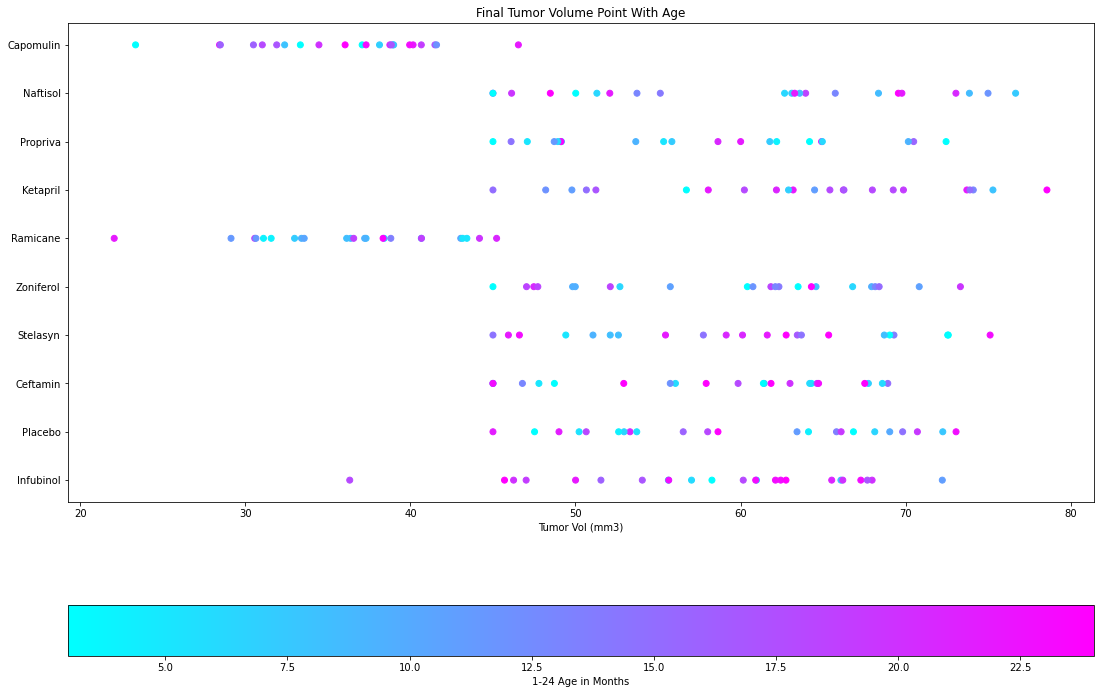

In [17]:
fig, ax1 = plt.subplots()
max_tumor = pymaceutical_data.groupby(['Mouse ID'])['Timepoint'].max()
max_tumor = max_tumor.reset_index()
merged_data = max_tumor.merge(pymaceutical_data, on=['Mouse ID', 'Timepoint'], how='left')
treatment_list = ['Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol',
       'Ramicane', 'Ketapril', 'Propriva', 'Naftisol', 'Capomulin']
cmap=plt.cm.cool
for drug in treatment_list:
    drug_volume_df = merged_data.loc[merged_data['Drug Regimen'] == drug].reset_index()
    x = drug_volume_df['Tumor Volume (mm3)']
    y = drug_volume_df['Drug Regimen']
    ax1.scatter(x, y, c=drug_volume_df['Age_months'], cmap=plt.cm.cool)  #, cmap=plt.cm.cool) # c=drug_volume_df['Age_months']) #, cmap=cm)
norm = mpl.colors.Normalize(vmin=drug_volume_df['Age_months'].min()
                            ,vmax=drug_volume_df['Age_months'].max())

    

fig.colorbar(plt.cm.ScalarMappable(norm=norm, cmap=cmap),ax=ax1,orientation='horizontal', label='1-24 Age in Months')
ax1.set_xlabel('Tumor Vol (mm3)')
ax1.set_title('Final Tumor Volume Point With Age')

plt.subplots_adjust(top=2.5,right=2.5)

## Results indicate that Ramican reduces mouse lifespan, while Capomulin has a longerspan. This is apparent because there are more blue-to-purple colors in Capomulin and light-blue to blue color in Ramicane. 
Indicating that younger mice reach final tumor volume with Ramicane vs. Capomulin. 